<a href="https://colab.research.google.com/github/Anshikaa4/Project-Object-Detection-in-drones-using-openCV-and-python-/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision numpy pandas opencv-python


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-7 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


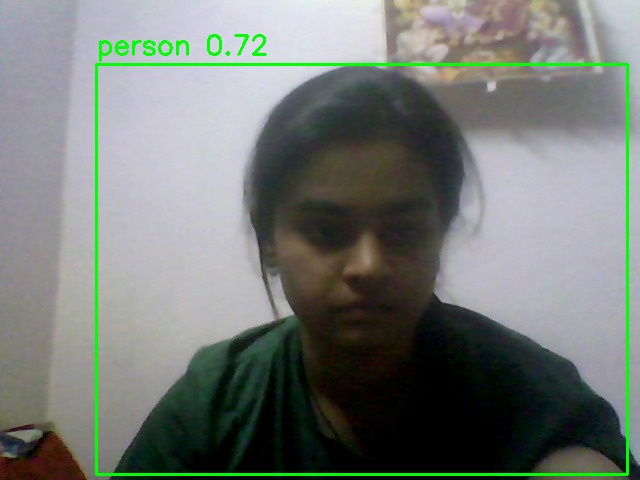

,Class,Confidence,X1,Y1,X2,Y2
0,person,0.721914,96,64,627,474


In [ ]:
import pandas as pd

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Read the image
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Prepare data for CSV
detections = []
for result in results.xyxy[0].cpu().numpy():
    x1, y1, x2, y2, confidence, class_id = result
    class_name = results.names[int(class_id)]
    detections.append([class_name, confidence, int(x1), int(y1), int(x2), int(y2)])

# Save detections to a CSV file
df = pd.DataFrame(detections, columns=['Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2'])
csv_path = 'detections.csv'
df.to_csv(csv_path, index=False)

# Draw bounding boxes and labels on the image
for detection in detections:
    class_name, confidence, x1, y1, x2, y2 = detection
    label = f"{class_name} {confidence:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Save and display the image with detections
output_path = 'detected_image.jpg'
cv2.imwrite(output_path, image)
display(Image(output_path))

# Display the CSV file
df.head()


In [ ]:
import torch
import cv2
import pandas as pd
from datetime import datetime

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Initialize a list to store the detection results
detection_results = []

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image")
        break

    # Perform object detection
    results = model(frame)

    # Get the current timestamp
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Draw bounding boxes and labels on the frame
    for result in results.xyxy[0].cpu().numpy():
        x1, y1, x2, y2, confidence, class_id = result
        class_name = results.names[int(class_id)]
        label = f"{class_name} {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Append the detection result to the list
        detection_results.append([timestamp, class_name, confidence, int(x1), int(y1), int(x2), int(y2)])

    # Display the resulting frame
    cv2.imshow('Real-Time Object Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

# Save the detection results to a CSV file
df = pd.DataFrame(detection_results, columns=['Timestamp', 'Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2'])
csv_path = 'detection_results.csv'
df.to_csv(csv_path, index=False)

print(f"Detection results saved to {csv_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-7 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Error: Could not open webcam.
Error: Failed to capture image
Detection results saved to detection_results.csv


In [ ]:
# Step 1: Upload the video file
from google.colab import files
uploaded = files.upload()

# Step 2: Verify the uploaded file name
video_path = 'your_video_file_name.mp4'  # Replace with your uploaded video file name

# The rest of the script remains the same

import torch
import cv2
import pandas as pd
from datetime import datetime
from google.colab.patches import cv2_imshow

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened correctly
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Initialize a list to store the detection results
detection_results = []

# Define a function to log detections to the CSV file
def log_detections(detection_results):
    df = pd.DataFrame(detection_results, columns=['Timestamp', 'Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2'])
    csv_path = 'detection_results.csv'
    df.to_csv(csv_path, index=False)
    print(f"Detection results saved to {csv_path}")

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("End of video file or error occurred.")
        break

    # Perform object detection
    results = model(frame)

    # Get the current timestamp
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Draw bounding boxes and labels on the frame and log results
    for result in results.xyxy[0].cpu().numpy():
        x1, y1, x2, y2, confidence, class_id = result
        class_name = results.names[int(class_id)]
        label = f"{class_name} {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Append the detection result to the list
        detection_results.append([timestamp, class_name, confidence, int(x1), int(y1), int(x2), int(y2)])

    # Display the resulting frame
    cv2_imshow(frame)

    # Break the loop if 'q' is pressed (in Colab, this won't work, so you can stop execution manually)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()

# Log the detection results to the CSV file
log_detections(detection_results)


Saving video2.mp4 to video2.mp4


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 134.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 142.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 11.0s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-6-8 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 205MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Error: Could not open video file.
Detection results saved to detection_results.csv
